In [11]:
# clr/clr and cld/cld omf analysis 
# to demonstrate the 'counter-intuitive varbc effect' 
# need to first run compile_radstat and then read the csv output
# initial built: 2024/09/05
import os
import numpy as np
from scipy.stats import norm
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta


In [31]:
instrument = 'amsua'
channel    = 'ch1'
cnst_err   = 2.3

'''
exps = ['ctrl','ctrl_noinf', \
        'only_clr_clr', 'clr_and_cld_0.05', \
        'clr_and_cld_0.05_sym', \
        'clr_and_cld_0.05_obs', \
        'clr_and_cld_0.05_model']
'''
'''
exps = ['ctrl','ctrl_noinf',\
        'only_clr_clr', 'only_clr_clr_noinf', \
        'clr_and_cld_0.05', 'clr_and_cld_0.05_noinf', \
        'clr_and_cld_0.05_sym_nobc', 'clr_and_cld_0.05_model_nobc','clr_and_cld_0.05_obs']

'''
exps = ['full_CTRL']
#exps = ['ctrl', 'ctrl_noinf', 'only_clr_clr','clr_and_cld_0.05']

#norm_bys = ['sym_error', 'final_error', 'cnst_error'] # final_error or sym_error
norm_bys = ['sym_error', 'cnst_error'] # final_error or sym_error

omf_or_fmo = 'fmo'

if omf_or_fmo == 'omf':
    plt_sign = 1
else:
    plt_sign = -1

init_time  = '2022062000'
final_time = '2022081000'

In [46]:
df={};
ct_all_nobc={}; ct_all_bc={};
ct_clr_nobc={}; ct_clr_bc={}; ct_cld_nobc={}; ct_cld_bc={}; ct_mis_nobc={}; ct_mis_bc={};
ct_clr_clddiff={}; ct_cld_clddiff={};

for exp in exps:
    print(f'processing {exp}')
    current_time = init_time
    
    ct_all_nobc[exp] = {}
    ct_all_bc  [exp] = {}    
    ct_clr_nobc[exp] = {}
    ct_clr_bc  [exp] = {}
    ct_cld_nobc[exp] = {}
    ct_cld_bc  [exp] = {}
    ct_mis_nobc[exp] = {}
    ct_mis_bc  [exp] = {}
    ct_clr_clddiff[exp] = {}
    ct_cld_clddiff[exp] = {}
    
    root='/gpfs/f6/bil-coastal-gfdl/scratch/Chih-Chi.Hu/'
    format_time=f'{init_time}_{final_time}'
    fn = f'{root}/compile_radstats/csv_files/{exp}/omf_stats_{instrument}_{channel}_{format_time}.csv'
    tmpdf=pd.read_csv(fn)
        
    # dfs = data frame screend
    screen = (tmpdf['fwater'] > 0.99) & (tmpdf['fland'] < 0.01) & ( tmpdf['errinv_ges'] >0 )
    dfs = tmpdf.loc[screen]

    # clr/clr and cld/cld definition
    cld_cri = 0.05
        
    # not much difference (?!)
        
    clr_def = (dfs['clw_obs'] <= cld_cri) & (dfs['clw_bg_ges'] <= cld_cri)
    cld_def = (dfs['clw_obs']  > cld_cri) & (dfs['clw_bg_ges']  > cld_cri)
    mis_def = (dfs['clw_obs'] <= cld_cri) & (dfs['clw_bg_ges']  > cld_cri) | \
              (dfs['clw_obs']  > cld_cri) & (dfs['clw_bg_ges'] <= cld_cri)
        
    df_clr = dfs.loc[clr_def]
    df_cld = dfs.loc[cld_def]
    df_mis = dfs.loc[mis_def]

    for norm_by in norm_bys:

        print(f'     processing {norm_by} ...')
        
        if norm_by == 'final_error':
            # normalized by the final obs error:
            omf_all_nobc = plt_sign*dfs['omfnbc_ges'].values * dfs['errinv_ges'].values
            omf_all_bc   = plt_sign*dfs['omf_ges'].values    * dfs['errinv_ges'].values
            omf_clr_nobc = plt_sign*df_clr['omfnbc_ges'].values * df_clr['errinv_ges'].values
            omf_clr_bc   = plt_sign*df_clr['omf_ges'].values    * df_clr['errinv_ges'].values
            omf_cld_nobc = plt_sign*df_cld['omfnbc_ges'].values * df_cld['errinv_ges'].values
            omf_cld_bc   = plt_sign*df_cld['omf_ges'].values    * df_cld['errinv_ges'].values
            omf_mis_nobc = plt_sign*df_mis['omfnbc_ges'].values * df_mis['errinv_ges'].values
            omf_mis_bc   = plt_sign*df_mis['omf_ges'].values    * df_mis['errinv_ges'].values
            
        elif norm_by == 'sym_error':
            ## normalized by the symmetric cloud
            omf_all_nobc = plt_sign*dfs['omfnbc_ges'].values / dfs['symerr_ges'].values
            omf_all_bc   = plt_sign*dfs['omf_ges'].values    / dfs['symerr_ges'].values
            omf_clr_nobc = plt_sign*df_clr['omfnbc_ges'].values / df_clr['symerr_ges'].values
            omf_clr_bc   = plt_sign*df_clr['omf_ges'].values    / df_clr['symerr_ges'].values
            omf_cld_nobc = plt_sign*df_cld['omfnbc_ges'].values / df_cld['symerr_ges'].values
            omf_cld_bc   = plt_sign*df_cld['omf_ges'].values    / df_cld['symerr_ges'].values
            omf_mis_nobc = plt_sign*df_mis['omfnbc_ges'].values / df_mis['symerr_ges'].values
            omf_mis_bc   = plt_sign*df_mis['omf_ges'].values    / df_mis['symerr_ges'].values        

        elif norm_by == 'cnst_error':
            ## normalized by constant error:
            omf_all_nobc = plt_sign*dfs['omfnbc_ges'].values / cnst_err
            omf_all_bc   = plt_sign*dfs['omf_ges'].values    / cnst_err
            omf_clr_nobc = plt_sign*df_clr['omfnbc_ges'].values / cnst_err
            omf_clr_bc   = plt_sign*df_clr['omf_ges'].values    / cnst_err
            omf_cld_nobc = plt_sign*df_cld['omfnbc_ges'].values / cnst_err
            omf_cld_bc   = plt_sign*df_cld['omf_ges'].values    / cnst_err
            omf_mis_nobc = plt_sign*df_mis['omfnbc_ges'].values / cnst_err
            omf_mis_bc   = plt_sign*df_mis['omf_ges'].values    / cnst_err  
            
        # define the bin_edges for the histogram
        dx = 0.1
        bin_max = 6
            
        bins = np.arange(-bin_max, bin_max+dx, dx)
            
        counts, _ = np.histogram(omf_all_nobc, bins=bins)
        ct_all_nobc[exp][norm_by] = counts
    
        counts, _ = np.histogram(omf_all_bc, bins=bins)
        ct_all_bc  [exp][norm_by] = counts
            
        counts, _ = np.histogram(omf_clr_nobc, bins=bins)
        ct_clr_nobc[exp][norm_by] = counts
    
        counts, _ = np.histogram(omf_clr_bc, bins=bins)
        ct_clr_bc  [exp][norm_by] = counts
            
        counts, _ = np.histogram(omf_cld_nobc, bins=bins)
        ct_cld_nobc[exp][norm_by] = counts
            
        counts, _ = np.histogram(omf_cld_bc, bins=bins)
        ct_cld_bc  [exp][norm_by] = counts
            
        #dx = 0.1
        #bin_max = 6
            
        bins_mis = np.arange(-bin_max, bin_max+dx, dx)
            
        counts, _ = np.histogram(omf_mis_nobc, bins=bins_mis)
        ct_mis_nobc[exp][norm_by] = counts
            
        counts, _ = np.histogram(omf_mis_bc, bins=bins_mis)
        ct_mis_bc  [exp][norm_by] = counts
        

processing full_CTRL
     processing sym_error ...
     processing cnst_error ...


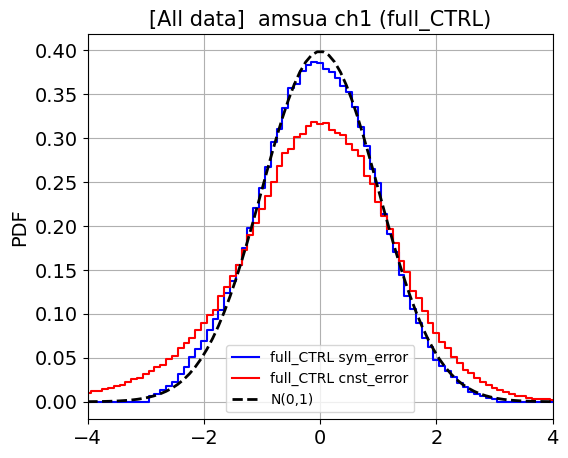

In [53]:
# Layover all distribution (Duncan 2022, Fig.5)

colors=['blue','red','green']

save_fig=False
'''
fig_dir = f'/home/Chih-Chi.Hu/python_codes/figures/clr_clr_cld_cld_analysis/full_cycled_mode/all_data/'

if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)
    print(f"Directory '{fig_dir}' created.")
'''

dx = 0.1
bin_max = 6

bins = np.arange(-bin_max, bin_max+dx, dx)
bin_center = 0.5*(bins[:-1] + bins[1:])

# standard Gaussian pdf
norm_gauss = norm.pdf(bin_center, loc=0, scale=1)

for exp in exps:
    fig, ax = plt.subplots(figsize=(6,5))
    
    for n, norm_by in enumerate(norm_bys):
        #ax.step(bin_center, ct_all_bc[exp][norm_by]/sum(ct_all_bc[exp][norm_by])/dx,  where='post',  linestyle='-', color=colors[n], label=f'{exp} {norm_by}')
        #ax.step(bin_center, ct_cld_bc[exp][norm_by]/sum(ct_cld_bc[exp][norm_by])/dx,  where='post',  linestyle='-', color=colors[n], label=f'{exp} {norm_by}')
        #ax.step(bin_center, ct_clr_bc[exp][norm_by]/sum(ct_clr_bc[exp][norm_by])/dx,  where='post', linestyle='-', color=colors[n], label=f'{exp} {norm_by}')
        ax.step(bin_center, ct_mis_bc[exp][norm_by]/sum(ct_mis_bc[exp][norm_by])/dx,  where='post', linestyle='-', color=colors[n], label=f'{exp} {norm_by}')

    ax.plot(bin_center, norm_gauss, linestyle='--', color='black', linewidth=2, label='N(0,1)')
    
    ax.legend()
        
    if channel in ('ch4','ch5','ch6'):
        ax.set_xlim(-6,4)
    else:
        ax.set_xlim(-4,4)
        #ax.set_xlim(-2.5,2.5)
    
    if norm_by == 'final_error':
        if omf_or_fmo == 'omf':
            ax.set_xlabel('normalized OmF (by final error)',fontsize=14)
        else:
            ax.set_xlabel('normalized FmO (by final error)',fontsize=14)
    elif norm_by == 'sym_error':
        if omf_or_fmo == 'omf':
            ax.set_xlabel('normalized OmF (by symmetric cloud error)',fontsize=14)
        else:
            ax.set_xlabel('normalized FmO (by symmetric cloud error)',fontsize=14)
    
    ax.set_ylabel('PDF',fontsize=14)
    #ax.set_ylim(-1000, 60000)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_title(f'[All data]  {instrument} {channel} ({exp})', fontsize=15)
    ax.grid(True)
    if save_fig:
        plt.savefig(f'{fig_dir}/all_{omf_or_fmo}_normby_{norm_by}_{instrument}_{channel}_{exp}.png', dpi=200, bbox_inches='tight')  


In [51]:
bin_center

array([-5.95, -5.85, -5.75, -5.65, -5.55, -5.45, -5.35, -5.25, -5.15,
       -5.05, -4.95, -4.85, -4.75, -4.65, -4.55, -4.45, -4.35, -4.25,
       -4.15, -4.05, -3.95, -3.85, -3.75, -3.65, -3.55, -3.45, -3.35,
       -3.25, -3.15, -3.05, -2.95, -2.85, -2.75, -2.65, -2.55, -2.45,
       -2.35, -2.25, -2.15, -2.05, -1.95, -1.85, -1.75, -1.65, -1.55,
       -1.45, -1.35, -1.25, -1.15, -1.05, -0.95, -0.85, -0.75, -0.65,
       -0.55, -0.45, -0.35, -0.25, -0.15, -0.05,  0.05,  0.15,  0.25,
        0.35,  0.45,  0.55,  0.65,  0.75,  0.85,  0.95,  1.05,  1.15,
        1.25,  1.35,  1.45,  1.55,  1.65,  1.75,  1.85,  1.95,  2.05,
        2.15,  2.25,  2.35,  2.45,  2.55,  2.65,  2.75,  2.85,  2.95,
        3.05,  3.15,  3.25,  3.35,  3.45,  3.55,  3.65,  3.75,  3.85,
        3.95,  4.05,  4.15,  4.25,  4.35,  4.45,  4.55,  4.65,  4.75,
        4.85,  4.95,  5.05,  5.15,  5.25,  5.35,  5.45,  5.55,  5.65,
        5.75,  5.85,  5.95])

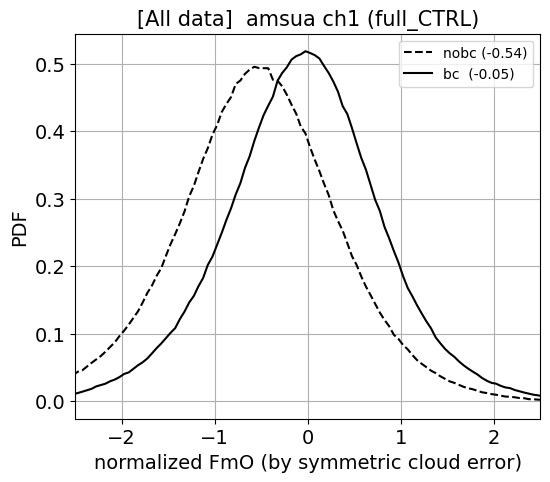

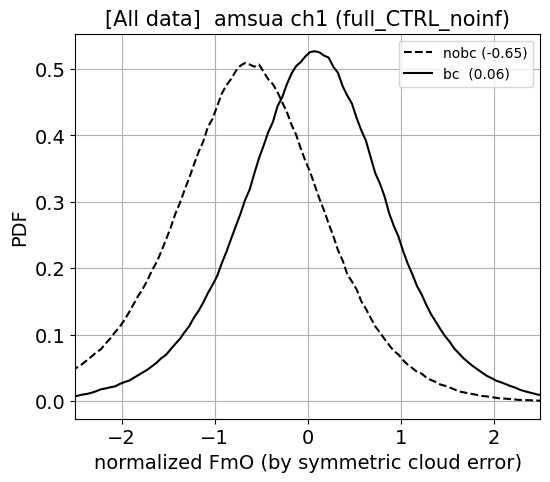

In [5]:
# Plot the all omf distribution

save_fig=False
'''
fig_dir = f'/home/Chih-Chi.Hu/python_codes/figures/clr_clr_cld_cld_analysis/full_cycled_mode/all_data/'

if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)
    print(f"Directory '{fig_dir}' created.")
'''

dx = 0.05
bin_max = 6

bins = np.arange(-bin_max, bin_max+dx, dx)
bin_center = 0.5*(bins[:-1] + bins[1:])

for exp in exps:
    #exptest = 'ctrl_noinf'
    fig, ax = plt.subplots(figsize=(6,5))
    ax.plot(bin_center, ct_all_nobc[exp]/sum(ct_all_nobc[exp])/dx,linestyle='--' ,color='black',  label=f'nobc ({mean_all_nobc[exp]:.2f})')
    ax.plot(bin_center, ct_all_bc[exp]/sum(ct_all_bc[exp])/dx,    linestyle='-'  ,color='black',  label=f'bc  ({mean_all_bc[exp]:.2f})')
    ax.legend()
    
    if channel in ('ch4','ch5','ch6'):
        ax.set_xlim(-6,4)
    else:
        #ax.set_xlim(-4,4)
        ax.set_xlim(-2.5,2.5)
    
    if norm_by == 'final_error':
        if omf_or_fmo == 'omf':
            ax.set_xlabel('normalized OmF (by final error)',fontsize=14)
        else:
            ax.set_xlabel('normalized FmO (by final error)',fontsize=14)
    elif norm_by == 'sym_error':
        if omf_or_fmo == 'omf':
            ax.set_xlabel('normalized OmF (by symmetric cloud error)',fontsize=14)
        else:
            ax.set_xlabel('normalized FmO (by symmetric cloud error)',fontsize=14)

    ax.set_ylabel('PDF',fontsize=14)
    #ax.set_ylim(-1000, 60000)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_title(f'[All data]  {instrument} {channel} ({exp})', fontsize=15)
    ax.grid(True)
    if save_fig:
        plt.savefig(f'{fig_dir}/all_{omf_or_fmo}_normby_{norm_by}_{instrument}_{channel}_{exp}.png', dpi=200, bbox_inches='tight')    

In [4]:
# estimate the mean & mode of each pdfs:
mean_all_bc={}; mean_all_nobc={}; 
mode_all_bc={}; mode_all_nobc={};
mean_clr_bc={}; mean_clr_nobc={}; mean_cld_bc={}; mean_cld_nobc={}; mean_mis_nobc={}; mean_mis_bc={};
mode_clr_bc={}; mode_clr_nobc={}; mode_cld_bc={}; mode_cld_nobc={};

dx = 0.05
bin_max = 6

bins = np.arange(-bin_max, bin_max+dx, dx)
bin_center = 0.5*(bins[:-1] + bins[1:])

dx = 0.1
bin_max = 6

bins_mis = np.arange(-bin_max, bin_max+dx, dx)
bin_center_mis = 0.5*(bins_mis[:-1] + bins_mis[1:])

for exp in exps:
    mean_all_bc[exp]   = sum(ct_all_bc[exp]  *bin_center/sum(ct_all_bc[exp]  ))
    mean_all_nobc[exp] = sum(ct_all_nobc[exp]*bin_center/sum(ct_all_nobc[exp]))
    mean_clr_bc[exp]   = sum(ct_clr_bc[exp]  *bin_center/sum(ct_clr_bc[exp]  ))
    mean_clr_nobc[exp] = sum(ct_clr_nobc[exp]*bin_center/sum(ct_clr_nobc[exp]))
    mean_cld_bc[exp]   = sum(ct_cld_bc[exp]  *bin_center/sum(ct_cld_bc[exp]  ))
    mean_cld_nobc[exp] = sum(ct_cld_nobc[exp]*bin_center/sum(ct_cld_nobc[exp]))
    mean_mis_bc[exp]   = sum(ct_mis_bc[exp]  *bin_center_mis/sum(ct_mis_bc[exp]  ))
    mean_mis_nobc[exp] = sum(ct_mis_nobc[exp]*bin_center_mis/sum(ct_mis_nobc[exp]))
    
    '''
    mode_all_bc[exp]   = bin_center[np.where(ct_all_bc[exp]   == max(ct_all_bc[exp]))  ]
    mode_all_nobc[exp] = bin_center[np.where(ct_all_bc[exp]   == max(ct_all_bc[exp]))  ]   
    mode_clr_bc[exp]   = bin_center[np.where(ct_clr_bc[exp]   == max(ct_clr_bc[exp]))  ]
    mode_clr_nobc[exp] = bin_center[np.where(ct_clr_nobc[exp] == max(ct_clr_nobc[exp]))]
    mode_cld_bc[exp]   = bin_center[np.where(ct_cld_bc[exp]   == max(ct_cld_bc[exp]))  ]
    mode_cld_nobc[exp] = bin_center[np.where(ct_cld_nobc[exp] == max(ct_cld_nobc[exp]))]
    '''

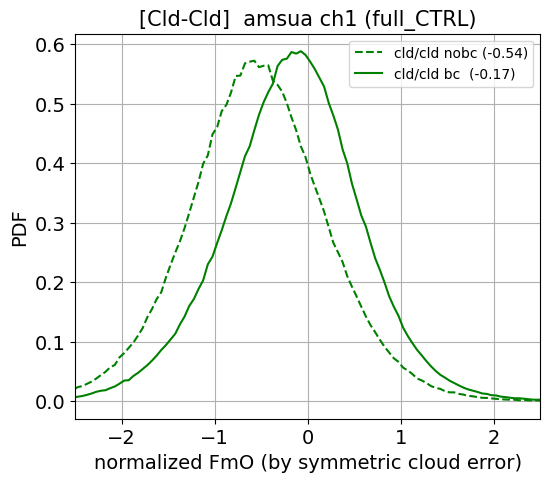

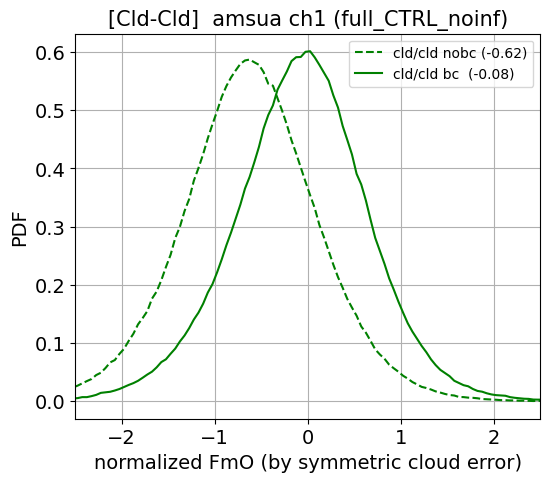

In [6]:
# Plot ONLY cld/cld omf distribution

save_fig=False
'''
fig_dir = f'/home/Chih-Chi.Hu/python_codes/figures/clr_clr_cld_cld_analysis/full_cycled_mode/cld_cld/'

if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)
    print(f"Directory '{fig_dir}' created.")
'''

dx = 0.05
bin_max = 6

bins = np.arange(-bin_max, bin_max+dx, dx)
bin_center = 0.5*(bins[:-1] + bins[1:])

for exp in exps:
    #exptest = 'ctrl_noinf'
    fig, ax = plt.subplots(figsize=(6,5))
    ax.plot(bin_center, ct_cld_nobc[exp]/sum(ct_cld_nobc[exp])/dx,linestyle='--' ,color='green', label=f'cld/cld nobc ({mean_cld_nobc[exp]:.2f})')
    ax.plot(bin_center, ct_cld_bc[exp]/sum(ct_cld_bc[exp])/dx,  linestyle='-'  ,color='green', label=f'cld/cld bc  ({mean_cld_bc[exp]:.2f})')
    ax.legend()
    
    if channel in ('ch4','ch5','ch6'):
        ax.set_xlim(-6,4)
    else:
        #ax.set_xlim(-4,4)
        ax.set_xlim(-2.5,2.5)
    
    if norm_by == 'final_error':
        if omf_or_fmo == 'omf':
            ax.set_xlabel('normalized OmF (by final error)',fontsize=14)
        else:
            ax.set_xlabel('normalized FmO (by final error)',fontsize=14)
    elif norm_by == 'sym_error':
        if omf_or_fmo == 'omf':
            ax.set_xlabel('normalized OmF (by symmetric cloud error)',fontsize=14)
        else:
            ax.set_xlabel('normalized FmO (by symmetric cloud error)',fontsize=14)

    ax.set_ylabel('PDF',fontsize=14)
    #ax.set_ylim(-1000, 35000)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_title(f'[Cld-Cld]  {instrument} {channel} ({exp})', fontsize=15)
    ax.grid(True)
    if save_fig:
        plt.savefig(f'{fig_dir}/cld_cld_{omf_or_fmo}_normby_{norm_by}_{instrument}_{channel}_{exp}.png', dpi=200, bbox_inches='tight')    

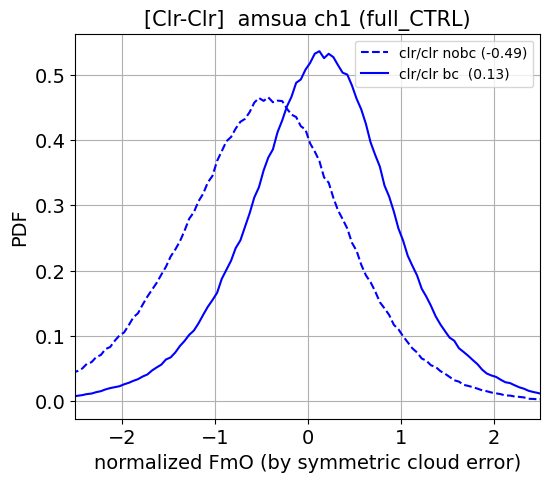

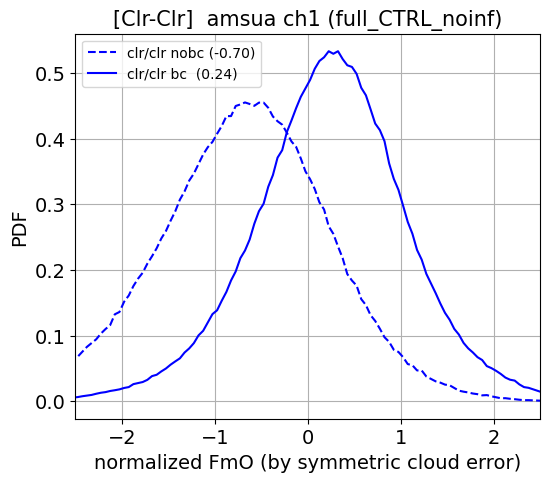

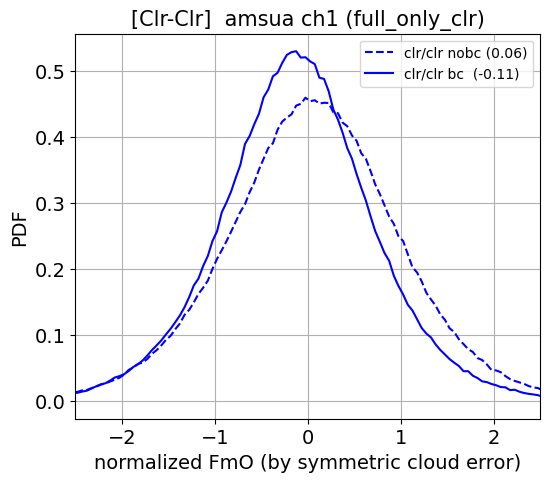

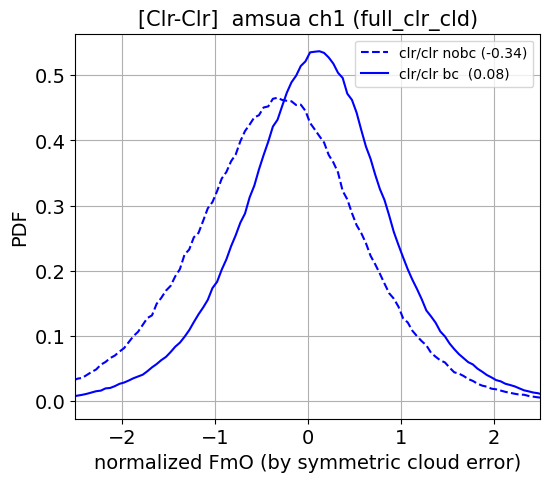

In [7]:
# Plot ONLY clr/clr omf distribution

save_fig=True

fig_dir = f'/home/Chih-Chi.Hu/python_codes/figures/clr_clr_cld_cld_analysis/full_cycled_mode/clr_clr/'

if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)
    print(f"Directory '{fig_dir}' created.")
    
dx = 0.05
bin_max = 6

bins = np.arange(-bin_max, bin_max+dx, dx)
bin_center = 0.5*(bins[:-1] + bins[1:])

for exp in exps:
    #exptest = 'ctrl_noinf'
    fig, ax = plt.subplots(figsize=(6,5))
    ax.plot(bin_center, ct_clr_nobc[exp]/sum(ct_clr_nobc[exp])/dx,linestyle='--' ,color='blue',  label=f'clr/clr nobc ({mean_clr_nobc[exp]:.2f})')
    ax.plot(bin_center, ct_clr_bc[exp]/sum(ct_clr_bc[exp])/dx,  linestyle='-'  ,color='blue',  label=f'clr/clr bc  ({mean_clr_bc[exp]:.2f})')
    ax.legend()
    
    if channel in ('ch4','ch5','ch6'):
        ax.set_xlim(-6,4)
    else:
        #ax.set_xlim(-4,4)
        ax.set_xlim(-2.5,2.5)
    
    if norm_by == 'final_error':
        if omf_or_fmo == 'omf':
            ax.set_xlabel('normalized OmF (by final error)',fontsize=14)
        else:
            ax.set_xlabel('normalized FmO (by final error)',fontsize=14)
    elif norm_by == 'sym_error':
        if omf_or_fmo == 'omf':
            ax.set_xlabel('normalized OmF (by symmetric cloud error)',fontsize=14)
        else:
            ax.set_xlabel('normalized FmO (by symmetric cloud error)',fontsize=14)

    ax.set_ylabel('PDF',fontsize=14)
    #ax.set_ylim(-1000, 25000)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_title(f'[Clr-Clr]  {instrument} {channel} ({exp})', fontsize=15)
    ax.grid(True)
    if save_fig:
        plt.savefig(f'{fig_dir}/clr_clr_{omf_or_fmo}_normby_{norm_by}_{instrument}_{channel}_{exp}.png', dpi=200, bbox_inches='tight')    

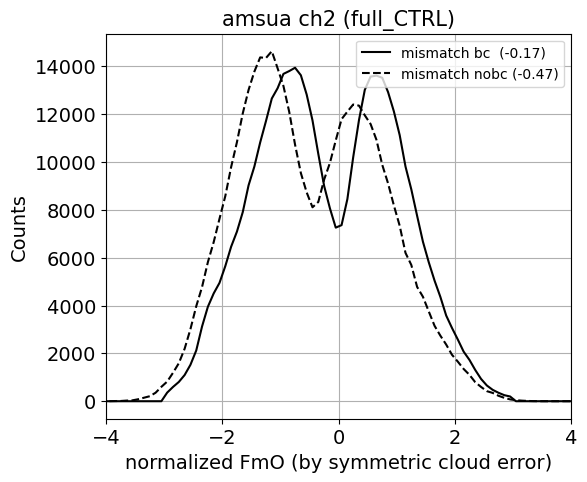

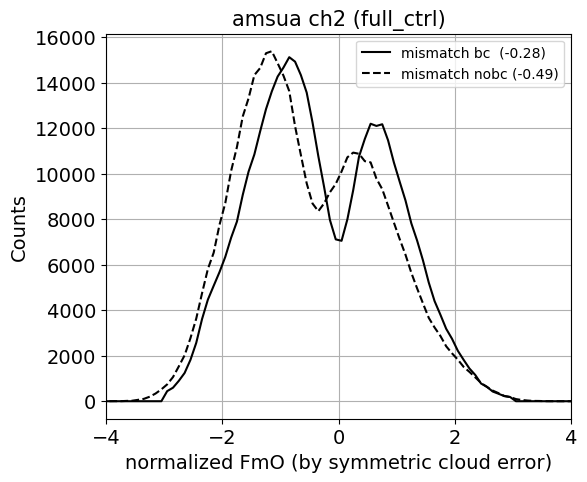

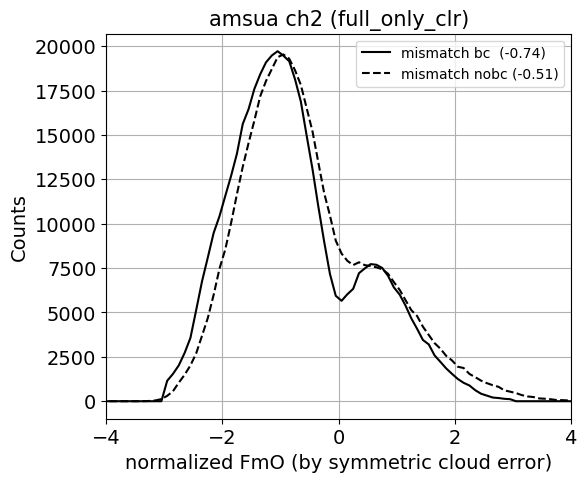

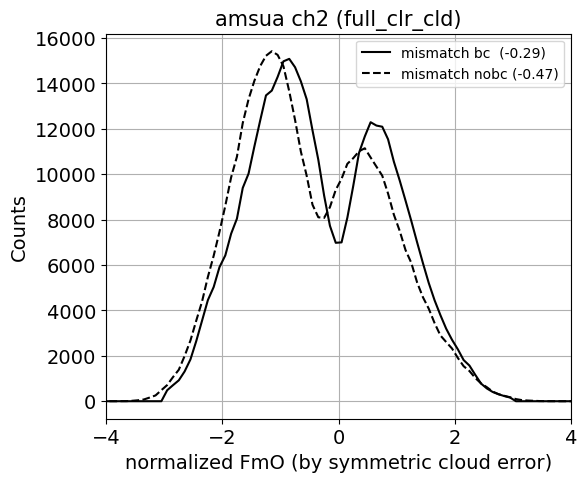

In [73]:
# Plot cloud mismatch
# Plot the clr/clr and cld/cld omf distribution

dx = 0.1
bin_max = 6

bins_mis = np.arange(-bin_max, bin_max+dx, dx)
bin_center_mis = 0.5*(bins_mis[:-1] + bins_mis[1:])

for exp in exps:
    #exptest = 'ctrl_noinf'
    fig, ax = plt.subplots(figsize=(6,5))
    ax.plot(bin_center_mis, ct_mis_bc[exp],  linestyle='-'  ,color='black', label=f'mismatch bc  ({mean_mis_bc[exp]:.2f})')
    ax.plot(bin_center_mis, ct_mis_nobc[exp],linestyle='--' ,color='black', label=f'mismatch nobc ({mean_mis_nobc[exp]:.2f})')
    ax.legend(loc='upper right')
    if channel in ('ch4','ch5','ch6'):
        ax.set_xlim(-6,4)
    else:
        ax.set_xlim(-4,4)
    
    if norm_by == 'final_error':
        if omf_or_fmo == 'omf':
            ax.set_xlabel('normalized OmF (by final error)',fontsize=14)
        else:
            ax.set_xlabel('normalized FmO (by final error)',fontsize=14)
    elif norm_by == 'sym_error':
        if omf_or_fmo == 'omf':
            ax.set_xlabel('normalized OmF (by symmetric cloud error)',fontsize=14)
        else:
            ax.set_xlabel('normalized FmO (by symmetric cloud error)',fontsize=14)

    ax.set_ylabel('Counts',fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_title(f'{instrument} {channel} ({exp})', fontsize=15)
    ax.grid(True)
    #plt.savefig(f'clr_clr_cld_cld_{omf_or_fmo}_normby_{norm_by}_{instrument}_{channel}_{exp}.png', dpi=200, bbox_inches='tight')    



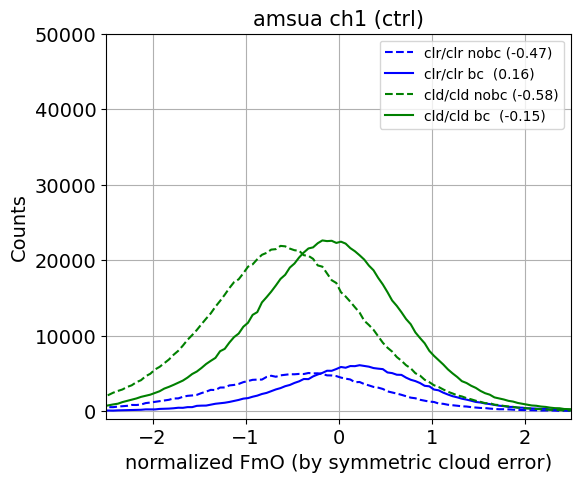

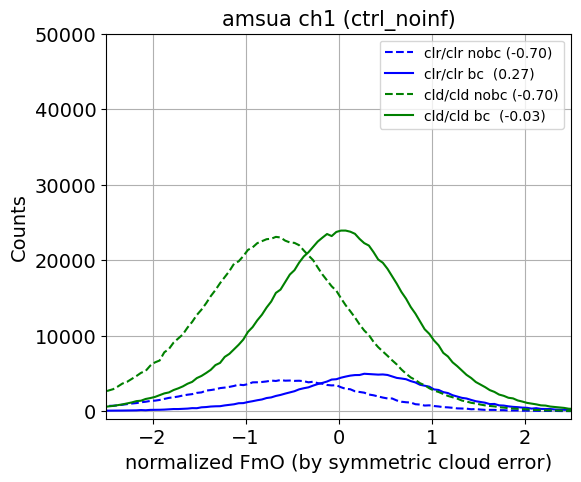

In [12]:
# Plot the clr/clr and cld/cld omf distribution

save_figure=False

dx = 0.05
bin_max = 6

bins = np.arange(-bin_max, bin_max+dx, dx)
bin_center = 0.5*(bins[:-1] + bins[1:])

for exp in exps:
    #exptest = 'ctrl_noinf'
    fig, ax = plt.subplots(figsize=(6,5))
    ax.plot(bin_center, ct_clr_nobc[exp],linestyle='--' ,color='blue',  label=f'clr/clr nobc ({mean_clr_nobc[exp]:.2f})')
    ax.plot(bin_center, ct_clr_bc[exp],  linestyle='-'  ,color='blue',  label=f'clr/clr bc  ({mean_clr_bc[exp]:.2f})')
    ax.plot(bin_center, ct_cld_nobc[exp],linestyle='--' ,color='green', label=f'cld/cld nobc ({mean_cld_nobc[exp]:.2f})')
    ax.plot(bin_center, ct_cld_bc[exp],  linestyle='-'  ,color='green', label=f'cld/cld bc  ({mean_cld_bc[exp]:.2f})')
    ax.legend()
    if channel in ('ch4','ch5','ch6'):
        ax.set_xlim(-6,4)
    else:
        #ax.set_xlim(-4,4)
        ax.set_xlim(-2.5,2.5)
    
    if norm_by == 'final_error':
        if omf_or_fmo == 'omf':
            ax.set_xlabel('normalized OmF (by final error)',fontsize=14)
        else:
            ax.set_xlabel('normalized FmO (by final error)',fontsize=14)
    elif norm_by == 'sym_error':
        if omf_or_fmo == 'omf':
            ax.set_xlabel('normalized OmF (by symmetric cloud error)',fontsize=14)
        else:
            ax.set_xlabel('normalized FmO (by symmetric cloud error)',fontsize=14)

    ax.set_ylabel('Counts',fontsize=14)
    ax.set_ylim(-1000, 50000)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_title(f'{instrument} {channel} ({exp})', fontsize=15)
    ax.grid(True)
    if save_figure:
        plt.savefig(f'clr_clr_cld_cld_{omf_or_fmo}_normby_{norm_by}_{instrument}_{channel}_{exp}.png', dpi=200, bbox_inches='tight')    

In [103]:
dfs[mis_def][['clw_obs', 'clw_bg_ges','omf_ges','omfnbc_ges']]

,clw_obs,clw_bg_ges,omf_ges,omfnbc_ges
116,0.043440,0.020935,-1.873120,1.421153
126,0.035544,0.026006,-2.219060,1.274239
148,0.043592,0.022999,-2.051647,1.570641
149,0.031630,0.015221,-1.372539,1.837820
160,0.027242,0.042059,-2.753912,0.498367
...,...,...,...,...
21862,0.084445,0.018263,-3.509634,-2.027049
21878,0.026676,0.081343,-5.310584,-3.164992
21880,0.015854,0.035483,-1.725145,0.703739
21888,0.017086,0.031702,1.007887,3.381280


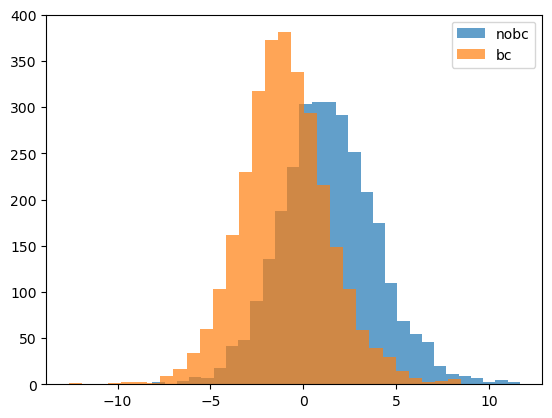

In [108]:
plt.hist(dfs[mis_def]['omfnbc_ges'], bins=30, alpha=0.7, label='nobc')
plt.hist(dfs[mis_def]['omf_ges'], bins=30, alpha=0.7, label='bc')
plt.legend()